In [2]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn import metrics
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#from gensim.models import Word2Vec
#from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
#from wordcloud import WordCloud

Reviews_df = pd.read_csv('C:/Users/billu/OneDrive/Desktop/5661 project/Reviews - Copy.csv')
Reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568165,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568166,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568167,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568168,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
Reviews_df['SentimentPolarity'] = Reviews_df['Score'].apply(lambda x : 'Positive' if x > 3 else 'Negative')
Reviews_df['Class_Labels'] = Reviews_df['SentimentPolarity'].apply(lambda x : 1 if x == 'Positive' else 0)

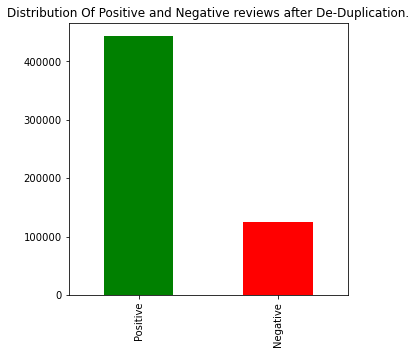

In [4]:
Reviews_df["SentimentPolarity"].value_counts().plot(kind='bar',color=['green','red'],title='Distribution Of Positive and Negative reviews after De-Duplication.',figsize=(5,5))

In [5]:
def removeNumbers(sentence):
    sentence = re.sub("\S*\d\S*", " ", sentence).strip()
    return (sentence)

#Function to clean html tags from a sentence
def removeHtml(sentence): 
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern,' ',sentence)
    return cleaned_text

#Remove URL from sentences.
def removeURL(sentence):
    text = re.sub(r"http\S+", " ", sentence)
    sentence = re.sub(r"www.\S+", " ", text)
    return (sentence)
    
#Function to keep only words containing letters A-Z and a-z. This will remove all punctuations, special characters etc. https://stackoverflow.com/a/5843547/4084039
def removePunctuations(sentence):
    cleaned_text  = re.sub('[^a-zA-Z]',' ',sentence)
    return (cleaned_text)

#https://stackoverflow.com/questions/37012948/regex-to-match-an-entire-word-that-contains-repeated-character
#Remove words like 'zzzzzzzzzzzzzzzzzzzzzzz', 'testtting', 'grrrrrrreeeettttt' etc. Preserves words like 'looks', 'goods', 'soon' etc. We will remove all such words which has three consecutive repeating characters.
def removePatterns(sentence): 
    cleaned_text  = re.sub("\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b",' ',sentence)
    return (cleaned_text)

In [6]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
sno = SnowballStemmer(language='english')

#Removing the word 'not' from stopwords
default_stopwords = set(stopwords.words('english'))
remove_not = set(['no', 'nor', 'not'])
custom_stopwords = default_stopwords - remove_not

print(custom_stopwords)

{"it's", 'what', 'mustn', 'wouldn', 'in', 'off', "you'll", 'be', 'most', 'didn', 'now', 'their', 'with', 'then', 'having', "isn't", "didn't", 'under', "doesn't", 'for', 'don', 'ma', 'but', 'd', 'as', 'her', 'have', 'whom', 'if', 'against', 'they', 'from', 'until', "she's", 'had', 'how', 'them', 'over', 'o', 'its', 'me', 're', 'that', 'below', 'was', 'by', 'just', 'more', "wouldn't", 'mightn', "needn't", 'because', 'these', 'after', 'you', 'any', 'itself', 'at', 'such', 'himself', 'between', "haven't", 'isn', "wasn't", 'when', 'herself', 'who', 'shouldn', 'of', 'myself', 'why', 'i', "hadn't", 'yourself', 'few', 'both', 'couldn', 's', "you'd", 'y', 'do', 't', 'same', "you're", 'ourselves', 'up', "aren't", 'down', 've', 'above', 'his', 'and', 'while', 'll', 'theirs', 'here', 'hasn', 'other', "won't", 'we', 'on', 'once', 'this', 'all', 'm', 'were', "should've", 'been', "mustn't", 'doing', 'ours', 'are', 'each', 'about', 'has', 'ain', "hasn't", "weren't", 'which', 'won', 'aren', 'wasn', 'it

In [7]:
total_words = []
preprocessed_reviews = []
stemed_word=' '
count=0
all_positive_words=[] #Store all the relevant words from Positive reviews
all_negative_words=[]

for review in tqdm(Reviews_df['Text'].values):
    filtered_sentence=[]
    review = removeNumbers(review)
    review = removeHtml(review)
    review = removeURL(review)
    review = removePunctuations(review)
    review = removePatterns(review)
    review = review.lower()
    
    for cleaned_words in review.split():   
        if((cleaned_words not in custom_stopwords) and (2<len(cleaned_words)<16)):
            stemed_word=(sno.stem(cleaned_words.lower()))                                   
            filtered_sentence.append(stemed_word)
            if (Reviews_df['SentimentPolarity'].values)[count] == 'Positive': 
                all_positive_words.append(stemed_word) #List of all the relevant words from Positive reviews
            if(Reviews_df['SentimentPolarity'].values)[count] == 'Negative':
                all_negative_words.append(stemed_word) #List of all the relevant words from Negative reviews
        else:
            continue
    review = " ".join(filtered_sentence) #Final string of cleaned words    
    preprocessed_reviews.append(review.strip()) #Data corpus contaning cleaned reviews from the whole dataset
    count+=1
    
        
    #for cleaned_words in review.split():   
        #if (cleaned_words not in custom_stopwords) :          
            #stemed_word=(sno.stem(cleaned_words.lower()))
            #filtered_sentence.append(stemed_word)
            
    #summary = " ".join(filtered_sentence) #Final string of cleaned words    
    #preprocessed_reviews.append(summary.strip()) #Data corpus contaning cleaned summarys from the whole dataset
    #count+=1        
    #review = filtered_sentence .join(total_words) #Final string of cleaned words
    #preprocessed_reviews.append(review) #Data corpus contaning cleaned summarys from the whole dataset
    

   
    
    

#total_words = list(set(total_words)) #Get list of unique words.
Reviews_df['CleanedText']=preprocessed_reviews

#A list to hold the length of each words used in all the reviews used across the whole dataset.
dist = []
for i in tqdm(total_words):
    length = len(i)
    dist.append(length)

# matplotlib histogram to see the distribution of the length of words
#plt.figure(figsize=(20,10))
#plt.hist(dist, color = 'red', edgecolor = 'blue', bins =90)
#plt.title('Distribution of the length of Words across all reviews.')
#plt.xlabel('Word Lengths')
#plt.ylabel('Number of Words')


100%|█████████████████████████████████████████████████████████████████████████| 568170/568170 [17:16<00:00, 548.00it/s]
0it [00:00, ?it/s]


In [8]:
filtered_sentence

['satisfi',
 'product',
 'advertis',
 'use',
 'cereal',
 'raw',
 'vinegar',
 'general',
 'sweetner']

In [9]:
Reviews_df.values[8]

array([9, 'B000E7L2R4', 'A1MZYO9TZK0BBI', 'R. James', 1, 1, 5, 1322006400,
       'Yay Barley',
       "Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too",
       'Positive', 1,
       'right most sprout cat eat grass love rotat around wheatgrass rye'],
      dtype=object)

In [10]:
Reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,SentimentPolarity,Class_Labels,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,1,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,0,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,1,confect around centuri light pillowi citrus ge...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,0,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,1,great taffi great price wide assort yummi taff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568165,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Positive,1,great sesam chicken good not better restur eat...
568166,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Negative,0,disappoint flavor chocol note especi weak milk...
568167,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive,1,star small give one train session tri train do...
568168,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive,1,best treat train reward dog good groom lower c...


In [17]:
X = Reviews_df['CleanedText']
y = Reviews_df['Class_Labels']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=100)
X_tr,X_cv,y_tr,y_cv = train_test_split(X_train,y_train,test_size=0.3,stratify=y_train,random_state=100)

In [16]:
import pickle
with open('all_positive_words.pkl', 'wb') as file:
    pickle.dump(all_positive_words, file)
    
with open('all_negative_words.pkl', 'wb') as file:
    pickle.dump(all_negative_words, file)

In [18]:
tf_idf_obj = TfidfVectorizer(ngram_range=(1,2), min_df=10, max_features=50000, dtype='float').fit(X_train)


C:\Users\billu\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [35]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
tfidf_features = vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [36]:
import pickle
with open('X_train_tfidf.pkl', 'wb') as file:
    pickle.dump(X_train_tfidf, file)
    
with open('X_test_tfidf.pkl', 'wb') as file:
    pickle.dump(X_test_tfidf, file)
    
with open('y_train.pkl', 'wb') as file:
    pickle.dump(y_train, file)
    
with open('y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)
    
with open('X_cv.pkl', 'wb') as file:
    pickle.dump(X_cv_tfidf, file)
    
with open('y_calib_TFIDF.pkl', 'wb') as file:
    pickle.dump(y_cv, file)

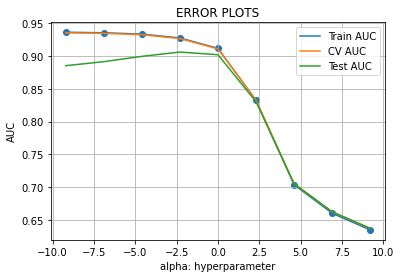

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
test_auc = []
alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for param in alpha:
    naive = MultinomialNB(alpha=param)
    naive.fit(X_train_tfidf,y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    y_train_pred =  naive.predict_proba(X_train_tfidf)[:,1]
    y_cv_pred =  naive.predict_proba(X_cv_tfidf)[:,1]
    y_test_pred = naive.predict_proba(X_test_tfidf)[:,1]
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    test_auc.append(roc_auc_score(y_test, y_test_pred))
#plotting
plt.grid(True)
plt.plot(np.log(alpha), train_auc, label='Train AUC')
plt.plot(np.log(alpha), cv_auc, label='CV AUC')
plt.plot(np.log(alpha), test_auc, label='Test AUC')
plt.scatter(np.log(alpha), train_auc)
#plt.scatter(np.log(alpha), cv_auc)
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [38]:
accuracy= cross_val_score(naive, X_test_tfidf, y_test, cv=10, scoring='accuracy')

In [39]:
print(accuracy)

[0.78065235 0.78069815 0.78069815 0.78069815 0.78069815 0.78069815
 0.78069815 0.78069815 0.78063948 0.78063948]


In [40]:
accuracy_train= cross_val_score(naive, X_train_tfidf, y_train, cv=10, scoring='accuracy')

In [41]:
print(accuracy_train)

[0.78069999 0.78069999 0.78067485 0.78067485 0.78067485 0.78067485
 0.78067485 0.78067485 0.78067485 0.78069448]
